In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from prince import PCA as prince_PCA  # Rename to avoid conflict with scikit-learn PCA
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.cluster import AgglomerativeClustering

In [44]:
genus = pd.read_csv('../data/rauw/illumina/Genus-level microbiota.csv')
genus.head(10)

,Sample ID,Finegoldia,Peptoniphilus,Anaerococcus,Campylobacter,Streptococcus,Staphylococcus,Moraxella,Prevotella,Ezakiella,...,Celeribacter,Kordia,Friedmanniella,Algibacter,Succinivibrio,Zunongwangia,Sporolactobacillus,Gordonibacter,Tardiphaga,Acidiphilium
0,UAB 17001,13.0064,17.8058,12.5382,0.6828,0.0650,1.8859,6.4642,1.5543,1.1706,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
1,UAB 17002,1.5782,0.0121,0.0081,0.0060,0.0845,1.4474,0.0040,0.0000,0.0040,...,0.002,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
2,UAB 17003,22.6964,9.1674,9.7704,6.9938,5.4781,0.4794,0.0685,19.7984,0.1258,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
3,UAB 17004,4.6980,0.7457,13.2737,0.2237,0.8203,6.4131,0.0000,0.9694,0.0000,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
4,UAB 17005,31.2522,7.9544,7.2007,1.8893,10.5617,7.8882,0.6366,0.0560,0.2648,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
5,UAB 17006,44.0232,12.9235,4.7403,0.0048,6.0025,3.2742,0.0000,0.0064,0.0161,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0016,0.0
6,UAB 17007,0.0513,0.0039,0.1842,0.0026,23.3051,30.6674,0.0000,0.5117,0.0013,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
7,UAB 17008,16.7037,31.7945,1.3631,9.2469,0.0707,1.2432,0.0000,2.0680,4.8445,...,0.000,0.0,0.0004,0.0,0.0004,0.0,0.0,0.0,0.0000,0.0
8,UAB 17009,5.4783,7.3148,27.1378,0.7582,5.3901,0.1187,0.0000,9.4521,1.2343,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
9,UAB 17010,9.3313,1.2029,1.7138,0.0393,24.3782,0.0477,12.3702,2.7764,0.0000,...,0.000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0


In [45]:
# Describe the statistical summary of the DataFrame.
genus.describe()

,Finegoldia,Peptoniphilus,Anaerococcus,Campylobacter,Streptococcus,Staphylococcus,Moraxella,Prevotella,Ezakiella,Corynebacterium,...,Celeribacter,Kordia,Friedmanniella,Algibacter,Succinivibrio,Zunongwangia,Sporolactobacillus,Gordonibacter,Tardiphaga,Acidiphilium
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,13.026725,11.133779,6.971352,5.781809,4.749939,3.796525,3.707684,3.580804,3.064221,3.038536,...,0.000041,0.000041,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000038,0.000037
std,11.631889,9.615312,7.341491,9.120442,6.862856,6.768350,8.383894,5.873432,6.198915,4.298341,...,0.000270,0.000184,0.000167,0.000245,0.000245,0.000145,0.000201,0.000209,0.000223,0.000188
min,0.000000,0.003900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.079300,1.774575,0.945000,0.011325,0.056625,0.176825,0.000000,0.086075,0.016075,0.193325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.990700,9.668800,4.151000,0.862400,0.844250,1.155650,0.002600,0.879050,0.160150,1.010200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.450025,17.552375,11.559300,7.758700,5.813725,4.085850,3.256900,3.141525,3.097800,4.872925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,44.023200,39.990300,30.925300,35.959300,24.378200,30.667400,39.045800,20.041000,31.926400,19.318100,...,0.002000,0.001100,0.001100,0.001800,0.001800,0.000700,0.001400,0.001300,0.001600,0.001300


In [46]:
# check for any null values
genus.isnull().sum()

Sample ID             0
Finegoldia            0
Peptoniphilus         0
Anaerococcus          0
Campylobacter         0
                     ..
Zunongwangia          0
Sporolactobacillus    0
Gordonibacter         0
Tardiphaga            0
Acidiphilium          0
Length: 805, dtype: int64

In [47]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
genus['fertility'] = genus['Sample ID'].str.split(' ').str[0]

genus_fertile = genus[genus['fertility'] == 'CON']
genus_fertile.drop(['fertility'], axis=1, inplace=True)

genus_infertile = genus[genus['fertility'] == 'UAB']
genus_infertile.drop(['fertility'], axis=1, inplace=True)

/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_8928/365009157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genus_fertile.drop(['fertility'], axis=1, inplace=True)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_8928/365009157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genus_infertile.drop(['fertility'], axis=1, inplace=True)


In [48]:
genus_fertile.head(5)

,Sample ID,Finegoldia,Peptoniphilus,Anaerococcus,Campylobacter,Streptococcus,Staphylococcus,Moraxella,Prevotella,Ezakiella,...,Celeribacter,Kordia,Friedmanniella,Algibacter,Succinivibrio,Zunongwangia,Sporolactobacillus,Gordonibacter,Tardiphaga,Acidiphilium
42,CON 01,21.6818,9.1978,9.6109,6.9948,5.7508,0.4364,0.0287,20.0410,0.0171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,CON 02,28.7358,6.7080,6.2142,0.9666,4.9881,12.7631,0.0000,0.0167,1.0545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,CON 03,33.2535,19.4305,5.7077,0.0131,5.4987,2.1507,0.0000,0.0131,0.0827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,CON 04,1.7412,1.5885,0.3386,8.1542,22.0822,23.9851,0.0000,0.3930,0.0060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,CON 05,18.0909,33.7088,1.4388,8.5251,0.0777,1.1370,0.0000,2.1064,5.4080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
genus_infertile.head(5)

,Sample ID,Finegoldia,Peptoniphilus,Anaerococcus,Campylobacter,Streptococcus,Staphylococcus,Moraxella,Prevotella,Ezakiella,...,Celeribacter,Kordia,Friedmanniella,Algibacter,Succinivibrio,Zunongwangia,Sporolactobacillus,Gordonibacter,Tardiphaga,Acidiphilium
0,UAB 17001,13.0064,17.8058,12.5382,0.6828,0.0650,1.8859,6.4642,1.5543,1.1706,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UAB 17002,1.5782,0.0121,0.0081,0.0060,0.0845,1.4474,0.0040,0.0000,0.0040,...,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UAB 17003,22.6964,9.1674,9.7704,6.9938,5.4781,0.4794,0.0685,19.7984,0.1258,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UAB 17004,4.6980,0.7457,13.2737,0.2237,0.8203,6.4131,0.0000,0.9694,0.0000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UAB 17005,31.2522,7.9544,7.2007,1.8893,10.5617,7.8882,0.6366,0.0560,0.2648,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# shape of fertile and infertile df
print('Fertile: ', genus_fertile.shape)
print('Infertile: ', genus_infertile.shape)

Fertile:  (14, 805)
Infertile:  (42, 805)


## genus fertile

### PCA

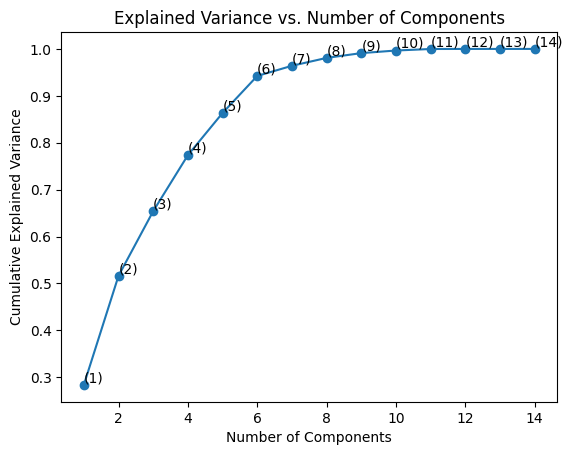

In [51]:
features = genus_fertile.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [52]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=8)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

### KMeans

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

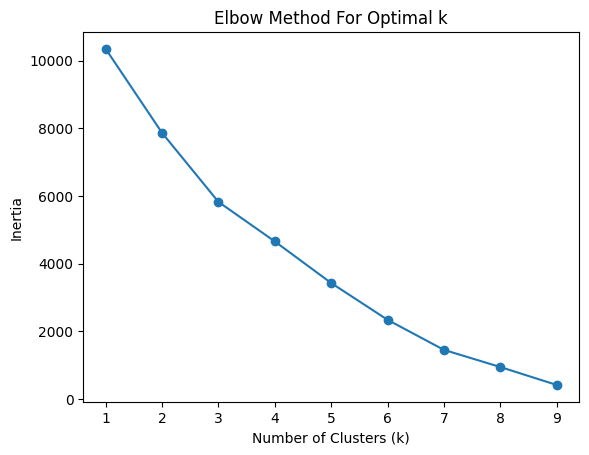

In [53]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_8928/2621179630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genus_fertile['cluster'] = cluster_labels


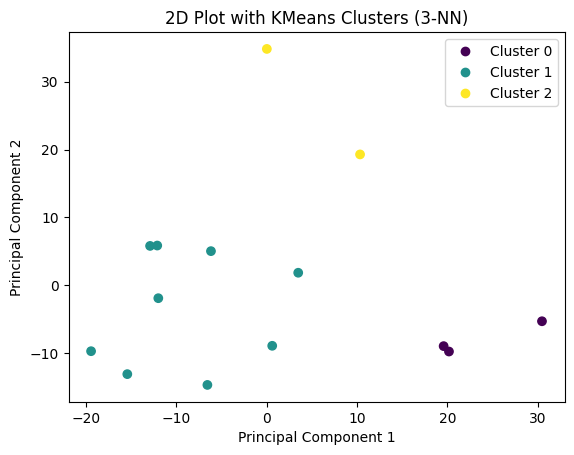

In [56]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
genus_fertile['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [57]:
# see how many samples are in each cluster
genus_fertile['cluster'].value_counts()

cluster
1    9
0    3
2    2
Name: count, dtype: int64

### KNN

In [58]:
# Assuming your data has cluster assignments in 'cluster' column
X = genus_fertile.iloc[:, 1:]  # Features
y = genus_fertile['cluster']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.3333333333333333
Confusion Matrix:
[[0 2]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

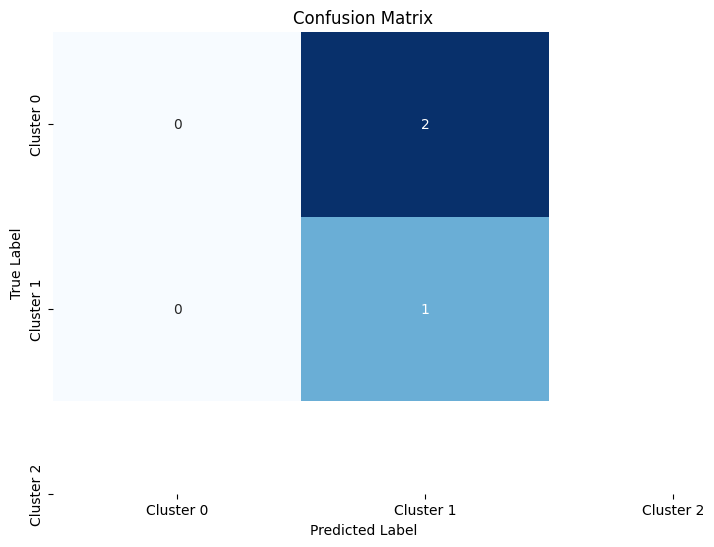

Accuracy: 0.3333333333333333
Confusion Matrix:
[[0 2]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [59]:
# Assuming your data has cluster assignments in 'cluster' column
X = features_pca  # Features after applying PCA
y = cluster_labels  # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

## genus infertile

### PCA

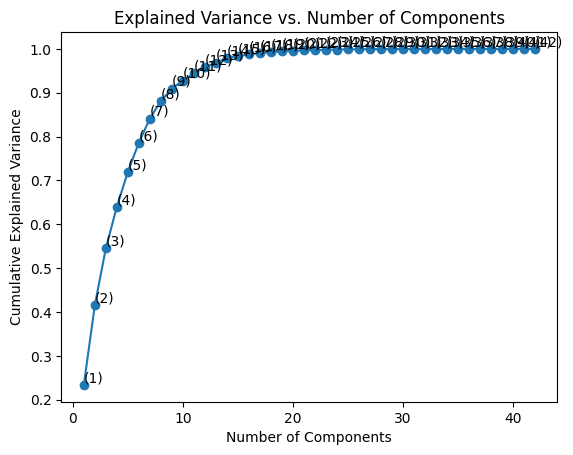

In [60]:
features = genus_infertile.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [61]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=13)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

### KMeans

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

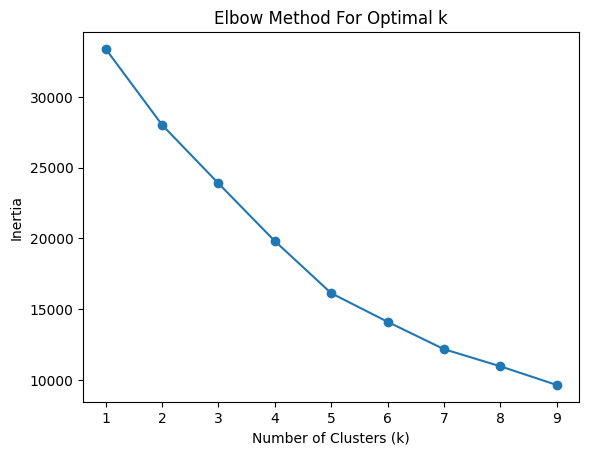

In [62]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/g5/wqqvw9hn7tz78jf7xt9n2xlc0000gn/T/ipykernel_8928/4102351826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genus_infertile['cluster'] = cluster_labels


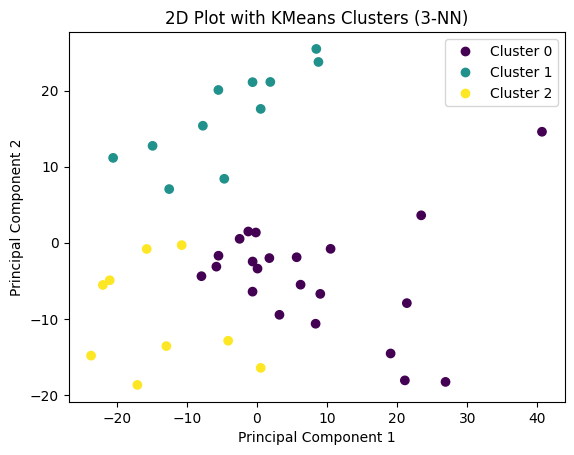

In [66]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
genus_infertile['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [67]:
# see how many samples are in each cluster
genus_infertile['cluster'].value_counts()

cluster
0    22
1    11
2     9
Name: count, dtype: int64

### Analysis

In [68]:
# statistics of each cluster
genus_infertile.groupby('cluster').describe()

Finegoldia                                                     \
             count       mean       std      min        25%       50%   
cluster                                                                 
0             22.0   6.814350  5.108243   0.0000   2.284425   6.47315   
1             11.0   9.193118  7.686954   0.6029   4.060450   5.65890   
2              9.0  31.170589  9.307033  17.5609  23.897700  31.25220   

                            Peptoniphilus             ... Tardiphaga          \
               75%      max         count       mean  ...        75%     max   
cluster                                               ...                      
0        10.936975  14.6558          22.0   6.210509  ...        0.0  0.0005   
1        14.551250  23.4528          11.0  19.304318  ...        0.0  0.0000   
2        37.046600  44.0232           9.0   9.527756  ...        0.0  0.0016   

        Acidiphilium                                                  
               count      mean       std  min  25%  50%  75%     max  
cluster                                                               
0               22.0  0.000095  0.000295  0.0  0.0  0.0  0.0  0.0013  
1               11.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0000  
2                9.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0000  

[3 rows x 6432 columns]

### KNN

In [69]:
# Assuming your data has cluster assignments in 'cluster' column
X = genus_infertile.iloc[:, 1:]  # Features
y = genus_infertile['cluster']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8888888888888888
Confusion Matrix:
[[5 0 0]
 [1 0 0]
 [0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         3

    accuracy                           0.89         9
   macro avg       0.61      0.67      0.64         9
weighted avg       0.80      0.89      0.84         9



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

## Fertility & Infertility

In [70]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
genus['fertility'] = genus['Sample ID'].str.split(' ').str[0]

# set fertility to 1 if CON, 0 if UAB
genus['fertility'] = np.where(genus['fertility'] == 'CON', 1, 0)

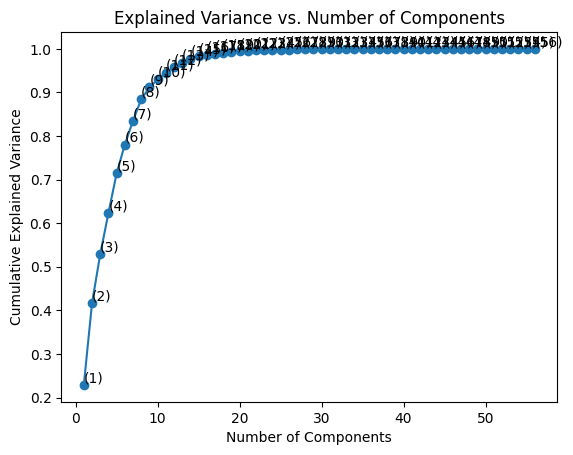

In [71]:
features = genus.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [72]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=12)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

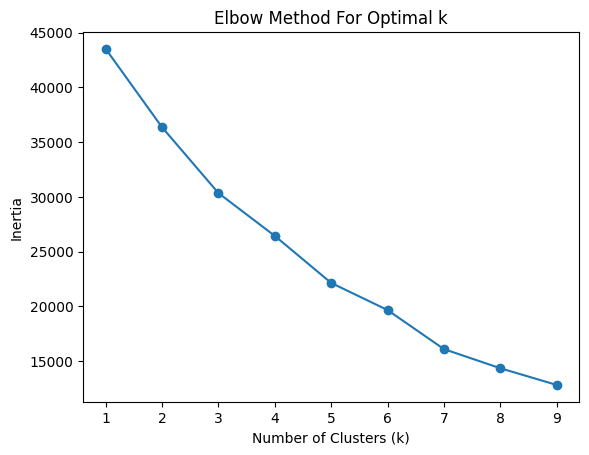

In [73]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


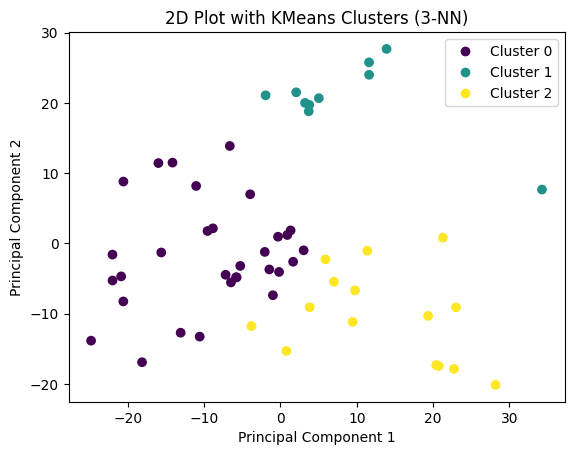

In [79]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
genus['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

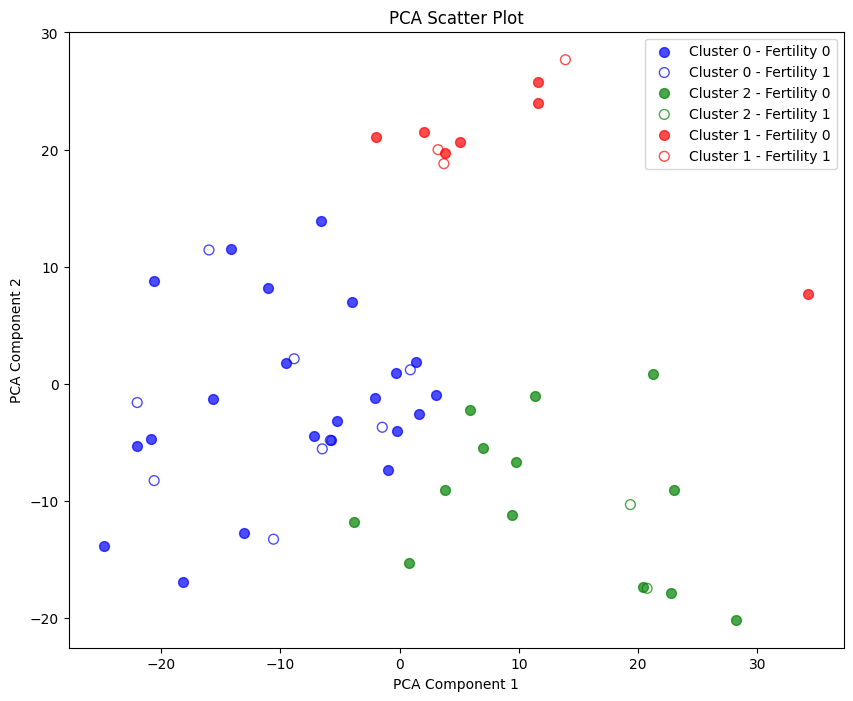

In [80]:
# Add the PCA components to the DataFrame
genus['PCA1'] = features_pca[:, 0]
genus['PCA2'] = features_pca[:, 1]

# Scatter plot with color based on cluster and shape based on fertility
plt.figure(figsize=(10, 8))

for cluster, color in zip(genus['cluster'].unique(), ['blue', 'green', 'red']):
    for fertility, fill in zip(genus['fertility'].unique(), [True, False]):
        subset = genus[(genus['cluster'] == cluster) & (genus['fertility'] == fertility)]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster} - Fertility {fertility}',
                    color=color, marker='o', s=50, alpha=0.7, edgecolors=color, linewidth=1, facecolors='none' if not fill else color)

plt.title('PCA Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [81]:
genus['cluster'].value_counts()

cluster
0    31
2    15
1    10
Name: count, dtype: int64

In [82]:
# statistics of each cluster and fertility
genus.groupby(['cluster', 'fertility']).describe()

Finegoldia                                           \
                       count       mean        std     min        25%   
cluster fertility                                                       
0       0               22.0  18.836573  12.356885  5.4783   8.429800   
        1                9.0  19.623189  10.254465  5.4876  13.264300   
1       0                7.0   4.003800   4.199187  0.0000   1.084650   
        1                3.0   4.356767   1.985708  2.0876   3.647000   
2       0               13.0   6.857238   7.559274  0.0152   1.578200   
        1                2.0   4.121150   3.365758  1.7412   2.931175   

                                                Peptoniphilus             ...  \
                        50%        75%      max         count       mean  ...   
cluster fertility                                                         ...   
0       0          14.07245  25.230075  44.0232          22.0  15.805927  ...   
        1          18.09090  28.735800  33.2535           9.0  17.860556  ...   
1       0           4.05290   4.702800  12.3988           7.0  10.505100  ...   
        1           5.20640   5.491350   5.7763           3.0   8.573300  ...   
2       0           4.69800   9.331300  23.8977          13.0   1.035569  ...   
        1           4.12115   5.311125   6.5011           2.0   1.149100  ...   

                        PCA1             PCA2                                  \
                         75%        max count       mean       std        min   
cluster fertility                                                               
0       0          -1.259214   3.037124  22.0  -1.357571  7.898722 -16.926727   
        1          -5.816409   0.889986   9.0  -2.504491  7.032003 -13.281133   
1       0          11.612940  34.273867   7.0  20.047963  5.850987   7.652479   
        1           8.801578  13.899486   3.0  22.152063  4.816436  18.796208   
2       0          21.284066  28.178635  13.0  -9.737224  6.709266 -20.157926   
        1          20.402108  20.752689   2.0 -13.900517  5.053814 -17.474103   

                                                               
                         25%        50%        75%        max  
cluster fertility                                              
0       0          -4.808714  -1.964089   1.815840  13.853903  
        1          -5.564916  -3.719072   1.186583  11.422183  
1       0          20.187960  21.066246  22.741557  25.757982  
        1          19.392699  19.989190  23.829990  27.670789  
2       0         -15.324176  -9.117140  -5.470414   0.798079  
        1         -15.687310 -13.900517 -12.113724 -10.326931  

[6 rows x 6448 columns]

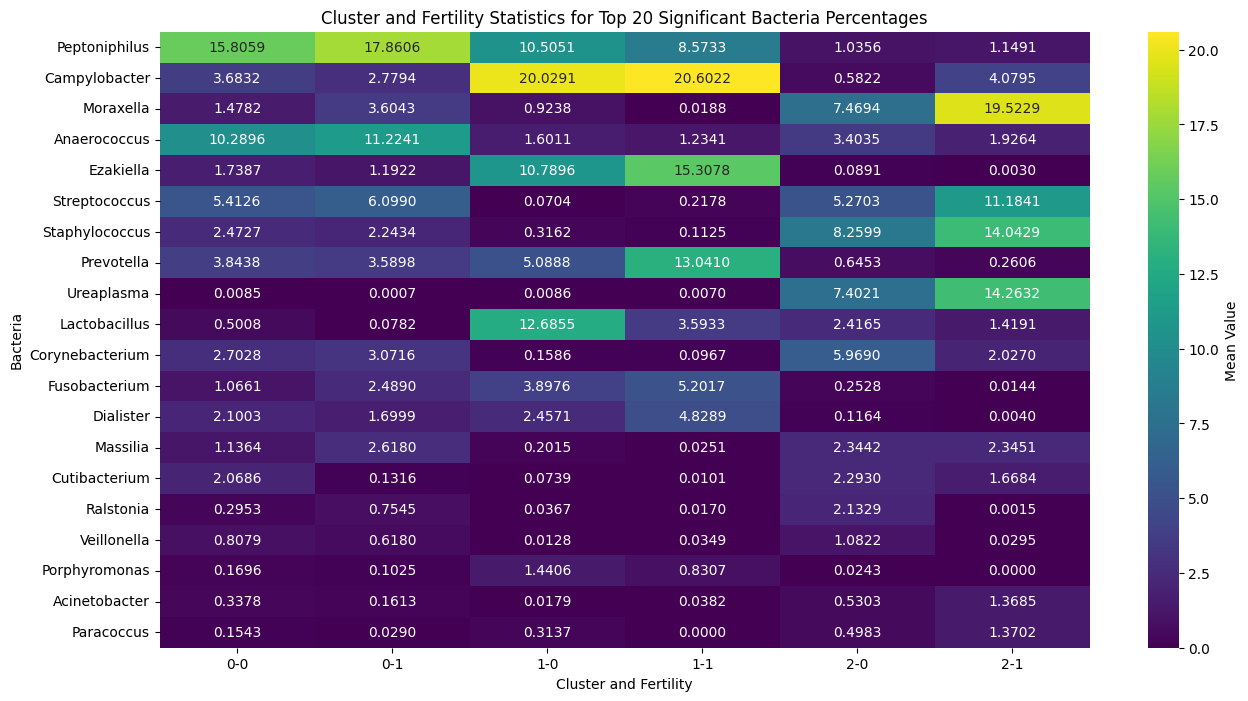

In [83]:
# Select relevant columns for visualization
columns_for_visualization = genus.columns[2:293]  # Assuming bacteria percentage columns start from index 2

# Calculate the mean for each bacteria across clusters and fertility
mean_values = genus.groupby(['cluster', 'fertility'])[columns_for_visualization].mean()

# Identify the top 20 significant columns based on mean values
top_columns = mean_values.mean(axis=0).nlargest(20).index

# Filter the original dataframe based on top columns
filtered_data = genus[['cluster', 'fertility'] + list(top_columns)]

# Group by cluster and fertility, then calculate the mean for each bacteria
grouped_data = filtered_data.groupby(['cluster', 'fertility'])[top_columns].mean()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(grouped_data.transpose(), cmap='viridis', annot=True, fmt=".4f", cbar_kws={'label': 'Mean Value'})
plt.title('Cluster and Fertility Statistics for Top 20 Significant Bacteria Percentages')
plt.xlabel('Cluster and Fertility')
plt.ylabel('Bacteria')
plt.show()

In [84]:
# Add a new column for each combination of cluster and fertility
genus['cluster_fertility'] = genus['cluster'].astype(str) + '_' + genus['fertility'].astype(str)
genus.head(5)

,Sample ID,Finegoldia,Peptoniphilus,Anaerococcus,Campylobacter,Streptococcus,Staphylococcus,Moraxella,Prevotella,Ezakiella,...,Zunongwangia,Sporolactobacillus,Gordonibacter,Tardiphaga,Acidiphilium,fertility,cluster,PCA1,PCA2,cluster_fertility
0,UAB 17001,13.0064,17.8058,12.5382,0.6828,0.0650,1.8859,6.4642,1.5543,1.1706,...,0.0,0.0,0.0,0.0,0.0,0,0,-5.272292,-3.214539,0_0
1,UAB 17002,1.5782,0.0121,0.0081,0.0060,0.0845,1.4474,0.0040,0.0000,0.0040,...,0.0,0.0,0.0,0.0,0.0,0,2,11.374651,-1.058738,2_0
2,UAB 17003,22.6964,9.1674,9.7704,6.9938,5.4781,0.4794,0.0685,19.7984,0.1258,...,0.0,0.0,0.0,0.0,0.0,0,0,-9.562446,1.751009,0_0
3,UAB 17004,4.6980,0.7457,13.2737,0.2237,0.8203,6.4131,0.0000,0.9694,0.0000,...,0.0,0.0,0.0,0.0,0.0,0,2,7.004628,-5.470414,2_0
4,UAB 17005,31.2522,7.9544,7.2007,1.8893,10.5617,7.8882,0.6366,0.0560,0.2648,...,0.0,0.0,0.0,0.0,0.0,0,0,-13.084794,-12.728425,0_0


In [85]:
genus['cluster_fertility'].value_counts()

cluster_fertility
0_0    22
2_0    13
0_1     9
1_0     7
1_1     3
2_1     2
Name: count, dtype: int64

### KNN

In [87]:
# Assuming your data has cluster assignments in 'cluster' column
X = genus.iloc[:, 1:-1]  # Features

# Remove cluster and fertility columns
X.drop(['cluster', 'fertility'], axis=1, inplace=True)

y = genus['cluster_fertility']    # Cluster assignments as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.75
Confusion Matrix:
[[6 0 0]
 [3 0 0]
 [0 0 3]]
Classification Report:
              precision    recall  f1-score   support

         0_0       0.67      1.00      0.80         6
         0_1       0.00      0.00      0.00         3
         2_0       1.00      1.00      1.00         3

    accuracy                           0.75        12
   macro avg       0.56      0.67      0.60        12
weighted avg       0.58      0.75      0.65        12



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

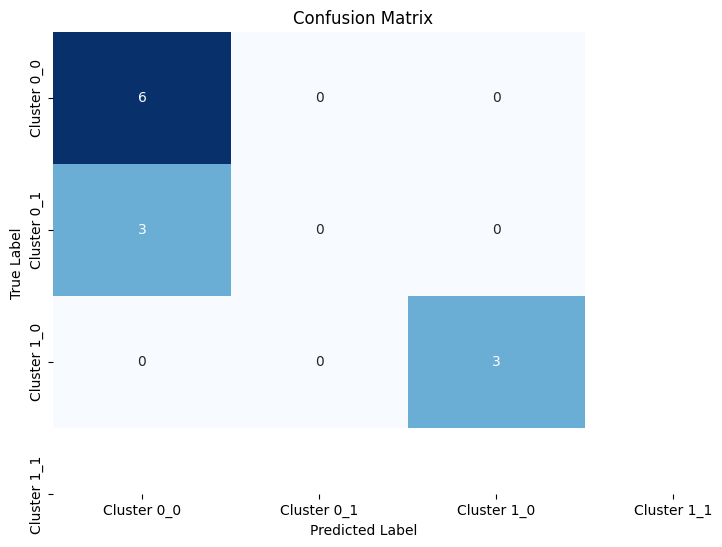

In [88]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Given a new input, mark why it is classified according to an specific cluster

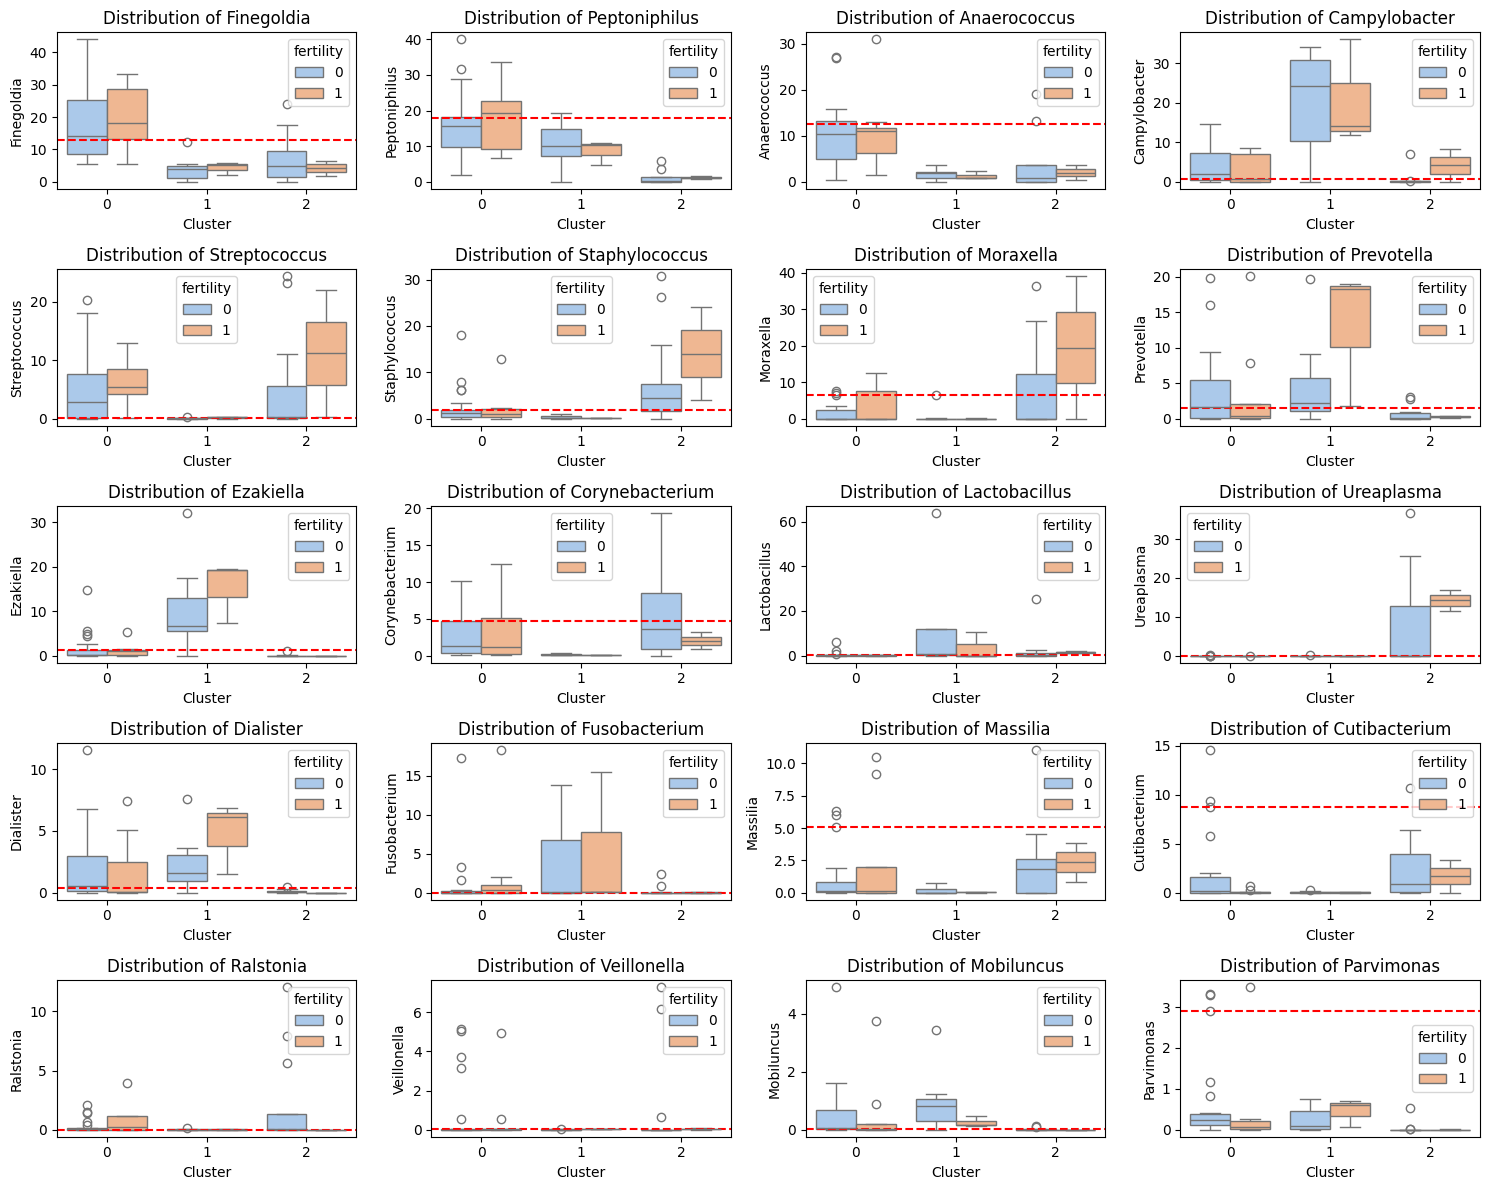

In [89]:
# Create a DataFrame with features and cluster labels
features_with_cluster = genus

# Specify the number of rows and columns for the subplots
num_rows = 5  # Adjust based on the number of features and your preferences
num_cols = 4

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Get the top 20 most significant features based on some criterion (e.g., feature importance)
top_features = features.columns[:20]

specific_value = genus.iloc[0, 1:32]

# Plot box plots for each feature in each cluster, color-coded by fertility
for i, feature in enumerate(top_features):
    sns.boxplot(x='cluster', y=feature, hue='fertility', data=features_with_cluster, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

    # Mark the specific value in red
    axes[i].axhline(y=specific_value[feature], color='red', linestyle='--', label='Specific Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [90]:
# Print the cluster and fertility of the specific value
genus.iloc[0, -2:]

PCA2                -3.214539
cluster_fertility         0_0
Name: 0, dtype: object

In [91]:
# save the KNN model
filename = 'genus_knn'
pickle.dump(knn, open(filename, 'wb'))

In [92]:
# save genus df
genus.to_csv('genus_clusters_fertility.csv', index=False)